In [13]:
import numpy as np
import xarray as xr
import glob
import salishsea_tools.river_202108 as rivers
import matplotlib.pyplot as plt

In [2]:
fnames_phys = glob.glob('01mar23_31mar23/*_grid_T_*.nc') + glob.glob('01apr23_30apr23/*_grid_T_*.nc')
fnames_fw = glob.glob('01mar23_31mar23/*_rivr_T_*.nc') +glob.glob('01apr23_30apr23/*_rivr_T_*.nc')

In [3]:
phys_rivers = xr.open_mfdataset(fnames_phys)
fw_rivers = xr.open_mfdataset(fnames_fw)

In [ ]:
fw_rivers.shape

In [4]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

In [5]:
def river_box(w_shed, r_call, box_side):  #TODO: change this to include the other river that falls off the edge
    river_idx = [rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j']]
    river_range = [river_idx[0] - box_side, river_idx[0] + box_side, river_idx[1] - box_side, river_idx[1] + box_side]

    if (river_range[0] < 0):
        river_range[0] = 0
        river_range[1] = box_side*2

    if (898 - river_range[1] < 0):
        river_range[0] = 898-box_side*2
        river_range[1] = 898

    return river_range

In [9]:
box_size = 40
# order (CW starting under the Fraser): Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish
Nooksack = river_box('fraser', 'Nooksack', box_size)
Skagit = river_box('skagit', 'Skagit1', box_size)
Snohomish = river_box('skagit', 'SnohomishAllenQuilceda', box_size)
Nisqually = river_box('puget', 'NisquallyMcAllister', box_size)
Elwha = river_box('jdf', 'Elwha', box_size)
Cowichan = river_box('evi_s', 'Cowichan1', box_size)
Nanaimo = river_box('evi_s', 'Nanaimo1', box_size)
Puntledge = river_box('evi_s', 'Puntledge', box_size)
Salmon = river_box('evi_n', 'SalmonSayward', box_size)
Homathko = river_box('bute', 'Homathko', box_size)
Squamish = river_box('howe', 'Squamish', box_size)

In [16]:
def make_ts_arr(region, jdepth, data):
    river_arr = data[:, 0, region[0]:region[1], region[2]:region[3]].sum(axis=2).sum(axis=1)
    return river_arr.to_numpy()

In [12]:
time = fw_rivers['time_counter'].to_numpy()

In [17]:
Nooksack_arr = make_ts_arr(Nooksack, 5, fw_rivers.nooksack_river)
Skagit_arr = make_ts_arr(Nooksack, 5, fw_rivers.skagit_river)
Snohomish_arr = make_ts_arr(Nooksack, 5, fw_rivers.snohomish_river)
Nisqually_arr = make_ts_arr(Nooksack, 5, fw_rivers.nisqually_river)
Elwha_arr = make_ts_arr(Nooksack, 5, fw_rivers.elwha_river)
Cowichan_arr = make_ts_arr(Nooksack, 5, fw_rivers.cowichan_river)
Nanaimo_arr = make_ts_arr(Nooksack, 5, fw_rivers.nanaimo_river)
Puntledge_arr = make_ts_arr(Nooksack, 5, fw_rivers.puntledge_river)
Salmon_arr = make_ts_arr(Nooksack, 5, fw_rivers.salmon_river)
Homathko_arr = make_ts_arr(Nooksack, 5, fw_rivers.homathko_river)
Squamish_arr = make_ts_arr(Nooksack, 5, fw_rivers.squamish_river)

: 

ValueError: x and y must have same first dimension, but have shapes (61,) and (5,)

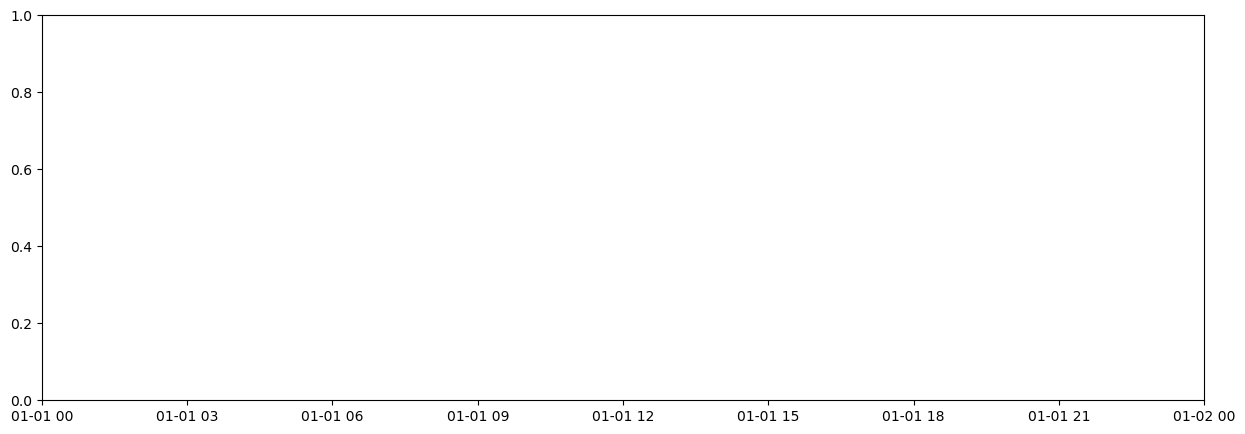

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(time, Nooksack_arr)